In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 
  


1.      Create a ID3 decision tree. Calculate entropy and Information gain at each step. Using the same training set as testing set, calculate all possible metrics.


      2.      For the above tree, calculate recall, precision and F1 score.
      

In [0]:
df=pd.read_csv("DA2.csv")

In [0]:
#df.columns=['A','B','C','D','Output']

In [0]:
dfn=df.convert_dtypes()
df=dfn

In [0]:
df.head()

,A,B,C,D,OUTPUT
0,Some,High,False,French,Yes
1,Full,Low,False,Thai,No
2,Some,Low,False,Burger,Yes
3,Full,Low,False,Thai,Yes
4,Full,High,False,French,No


In [0]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['aenco']=labelencoder.fit_transform(df['A'])
df['benco']=labelencoder.fit_transform(df['B'])
df['cenco']=labelencoder.fit_transform(df['C'])
df['denco']=labelencoder.fit_transform(df['D'])

In [0]:
df.drop(columns=['A','B','C','D'],inplace=True)

In [0]:
df

,OUTPUT,aenco,benco,cenco,denco
0,Yes,2,0,0,0
1,No,0,1,0,4
2,Yes,2,1,0,1
3,Yes,0,1,0,4
4,No,0,0,0,2
5,Yes,2,2,1,3
6,No,1,1,1,1
7,Yes,2,2,1,4
8,No,0,1,1,1
9,No,0,0,0,3


In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from sklearn.preprocessing import LabelEncoder

from IPython.display import Image
import pydotplus

In [0]:
X=df.iloc[:,1:]
Y=df.iloc[:,0]
X=np.array(X)
Y=np.array(Y)

In [0]:
Y

array(['Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No',
       'Yes', 'Yes'], dtype=object)

In [0]:
tree=DecisionTreeClassifier(criterion='entropy')
#tree = DecisionTreeClassifier(criterion='entropy',max_depth=3)
tree.fit(X,Y) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

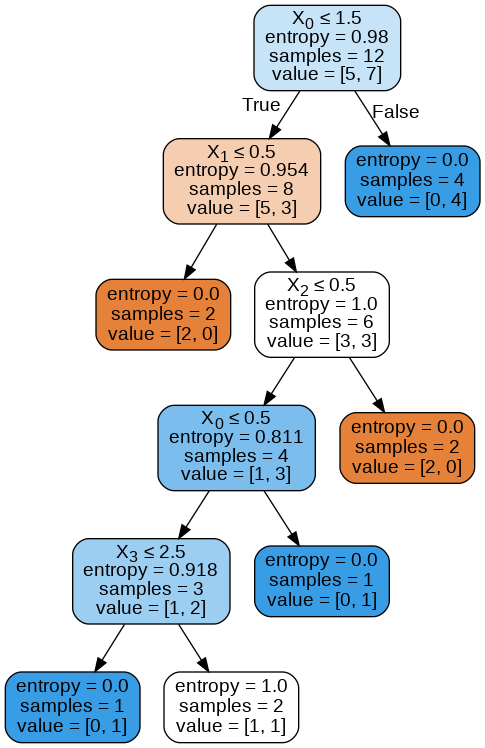

In [0]:
dot_data = StringIO()
export_graphviz(tree,out_file=dot_data,filled=True,rounded=True,special_characters=True)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(), width=800,height=300)

prediction,accuracy and recall

In [0]:
predict=tree.predict(X)
df['predict']=predict

In [0]:
from sklearn import metrics
print('Accuracy:',metrics.accuracy_score(Y,predict))

Accuracy: 0.9166666666666666


In [0]:
from sklearn.metrics import f1_score

f1_score(Y , predict , average='weighted')

0.9172494172494172

In [0]:
from sklearn.metrics import recall_score
recall_score(Y,predict,average='macro')

0.9285714285714286

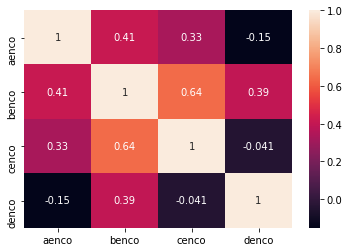

In [0]:
import seaborn as sb 
sb.heatmap(df.corr(),annot=True)

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y,predict)

array([[5, 0],
       [1, 6]])